## Project IMHOTEP
Check order of magnitude of the terms of the global water budget from IMHOTEP simulations

### Import modules

In [2]:
## standart libraries

import os,sys
import numpy as np

# xarray
import xarray as xr

# plot
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap

import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.colors import from_levels_and_colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from matplotlib import cm 
from matplotlib.colors import ListedColormap,LinearSegmentedColormap

import cartopy.feature as cfeature


# custom tools for plotting
sys.path.append('./')
from libimhotep import libSLXtoolsIMHOTEP as li


import cmocean

# for jupyter notebook display
%matplotlib inline

import pkg_resources


import warnings
warnings.filterwarnings('ignore')

plt.rcParams.update({'hatch.color': '#086A87'})

# list packages to be checked
root_packages = [
     'numpy', 
    'matplotlib', 'cartopy', 'cmocean']

# print versions, but check if package is imported first
for m in pkg_resources.working_set:
    if m.project_name.lower() in root_packages:
        print(f"{m.project_name}=={m.version}")

Name: libimhotep.libSLXtoolsIMHOTEP
Package: libimhotep
This is a collection of  tools i often use when analysing the IMHOTEP project data.
numpy==1.20.0
matplotlib==3.3.4
cmocean==2.0
Cartopy==0.18.0


In [3]:
prefix = "eORCA025.L75-IMHOTEP"

# NAME of ENSEMBLE EXPERIMENT:
# "EAI": all runoffs varying
# "ES": all runoffs climatological
nexp = "EGAI.001"

varnasss = 'sosaline'

# ensemble size
NE=10

# years to read data from:
y1='1980'
y2='2018'

fo="1y" # output frequency

# input directory on work for grid info
diri="/gpfswork/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-I/"

# plot directory
diro="/gpfswork/rech/cli/regi915/PLT/dec2022/"+fo+"/"

# data output directory
dirdat="/gpfswork/rech/cli/regi915/DAT/"


* Find directory and file list

In [4]:
# Files directory
diridat = li.Ffindinputdata(nexp,prefix=prefix)

# flxT file list
rnffiles = li.Ffindinputdfiles(nexp,diridat,fo,prefix=prefix,fity="flxT")
print(rnffiles)


/gpfsstore/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-IMHOTEP.EGAI.001-S/1y/????/eORCA025.L75-IMHOTEP.EGAI.001*flxT.nc


---
# RIVER RUNOFF TERM: about 33 000  Gt/yr  (same as km3/yr)

* Load RUNOFFS  in flxT files

In [4]:
varnarnf = 'sornf'

In [4]:
# RNF
RNF1 = li.imhov(rnffiles, varnarnf,nexp,fo,y1,y2,diff=False,dirigrid=diri)
RNF1.process()
RNF1.convertRNF()

* Plot Global map of runoffs in km3/yr (as a check of total budget):

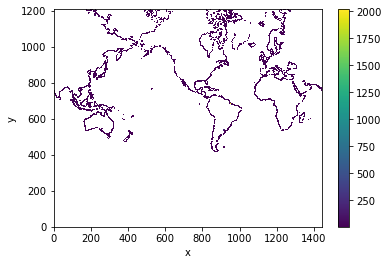

In [5]:
rnfselmap = RNF1.data_budget.squeeze().mean(dim='time_counter').plot()

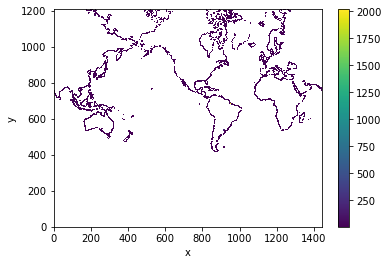

In [6]:
rnfselmap = RNF1.data_budget.squeeze()  
globalRN = rnfselmap.where(rnfselmap>0).squeeze()
globalRN.mean(dim='time_counter').plot()

stacked_data = globalRN.stack(z=("x", "y"))
tsglobalRN = stacked_data.sum(dim='z')

In [7]:
tsglobalRN.mean().values

array(33581.33077969)

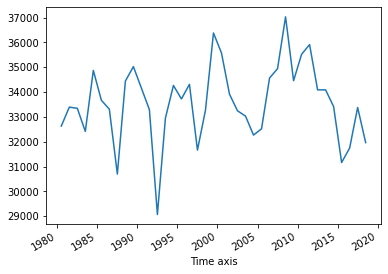

In [8]:
tsglobalRN.plot()

In average : river runoffs about 33 km3/yr or Gt/yr

---
# ICESHELF TERM: about  1430 Gt/yr  

* Load ICESHELF MELT  in flxT files

In [5]:
varnarnf = 'fwfisf'


In [7]:
# RNF
RNF1 = li.imhov(rnffiles, varnarnf,nexp,fo,y1,y2,diff=False,dirigrid=diri)
RNF1.process()
RNF1.convertRNF()

* Plot Global map in km3/yr (as a check of total budget):

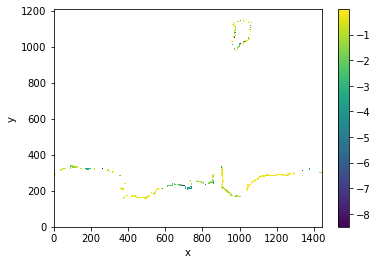

In [12]:
rnfselmap = RNF1.data_budget.squeeze().mean(dim='time_counter').plot()

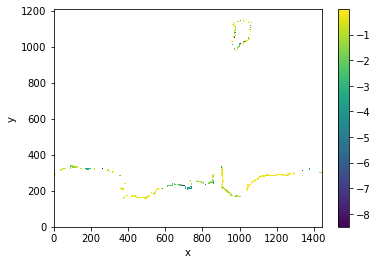

In [13]:
rnfselmap = RNF1.data_budget.squeeze()  
globalRN = rnfselmap.where(rnfselmap<0).squeeze()
globalRN.mean(dim='time_counter').plot()

stacked_data = globalRN.stack(z=("x", "y"))
tsglobalRN = stacked_data.sum(dim='z')

In [14]:
tsglobalRN.mean().values

array(-1429.57921556)

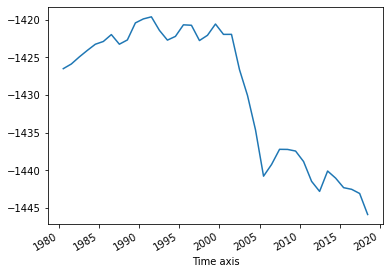

In [15]:
tsglobalRN.plot()

In average : iceshelf melting about 1430 km3/yr or Gt/yr

---
# ICEBERGS MELT TERM: about  1460 Gt/yr  

* Load ICEBERG MELT  in ICBT files

In [6]:
varnarnf = 'berg_melt'
# ICBT file list
rnffiles = li.Ffindinputdfiles(nexp,diridat,fo,prefix=prefix,fity="ICBT")
print(rnffiles)


/gpfsstore/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-IMHOTEP.EGAI.001-S/1y/????/eORCA025.L75-IMHOTEP.EGAI.001*ICBT.nc


In [7]:
# RNF
RNF1 = li.imhov(rnffiles, varnarnf,nexp,fo,y1,y2,diff=False,dirigrid=diri)
RNF1.process()
RNF1.convertRNF()

* Plot Global map in km3/yr (as a check of total budget):

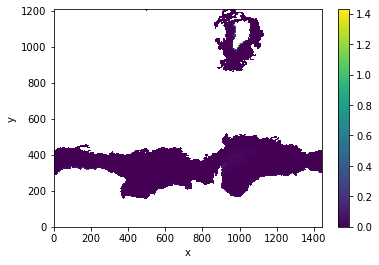

In [8]:
rnfselmap = RNF1.data_budget.squeeze().mean(dim='time_counter').plot()

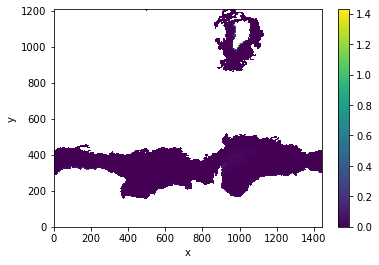

In [10]:
rnfselmap = RNF1.data_budget.squeeze()  
globalRN = rnfselmap.squeeze()
globalRN.mean(dim='time_counter').plot()

stacked_data = globalRN.stack(z=("x", "y"))
tsglobalRN = stacked_data.sum(dim='z')

In [11]:
tsglobalRN.mean().values

array(1459.71530993)

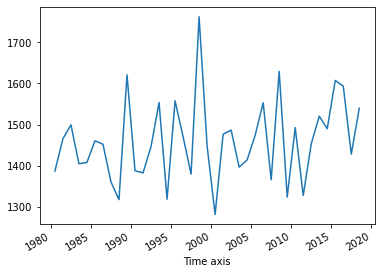

In [12]:
tsglobalRN.plot()

In average : iceberg melting about 1459 km3/yr or Gt/yr

---
# PRECIP TERM: about 414 000  Gt/yr

* Load PRECIP  in flxT files

In [15]:
varnarnf = 'sowapre'
# ICBT file list
rnffiles = li.Ffindinputdfiles(nexp,diridat,fo,prefix=prefix,fity="flxT")
print(rnffiles)


/gpfsstore/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-IMHOTEP.EGAI.001-S/1y/????/eORCA025.L75-IMHOTEP.EGAI.001*flxT.nc


In [7]:
# RNF
RNF1 = li.imhov(rnffiles, varnarnf,nexp,fo,y1,y2,diff=False,dirigrid=diri)
RNF1.process()
RNF1.convertRNF()

* Plot Global map in km3/yr (as a check of total budget):

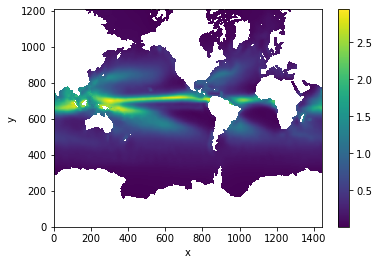

In [8]:
rnfselmap = RNF1.data_budget.squeeze().mean(dim='time_counter').plot()

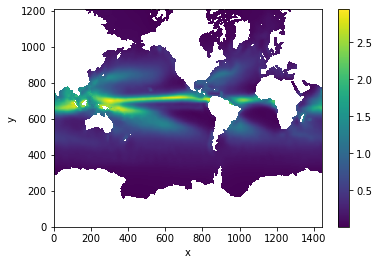

In [9]:
rnfselmap = RNF1.data_budget.squeeze()  
globalRN = rnfselmap.where(rnfselmap>0).squeeze()
globalRN.mean(dim='time_counter').plot()

stacked_data = globalRN.stack(z=("x", "y"))
tsglobalRN = stacked_data.sum(dim='z')

In [12]:
tsglobalRN.mean().values

array(413969.10722612)

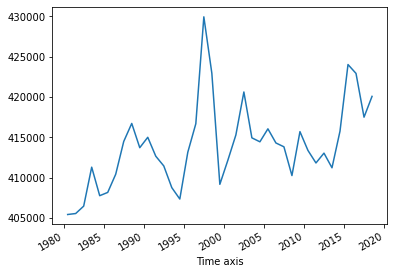

In [13]:
tsglobalRN.plot()

In average : global precip about 414 000 km3/yr or Gt/yr

---
# E-P-R  TERM: about 1100  Gt/yr 

* Load Net upward water flux  in flxT files

In [8]:
varnarnf = 'sowaflup'

In [9]:
# RNF
RNF1 = li.imhov(rnffiles, varnarnf,nexp,fo,y1,y2,diff=False,dirigrid=diri)
RNF1.process()
RNF1.convertRNF()

* Plot Global map in km3/yr (as a check of total budget):

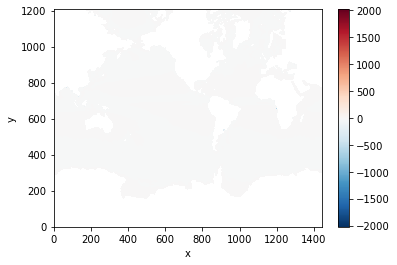

In [10]:
rnfselmap = RNF1.data_budget.squeeze().mean(dim='time_counter').plot()

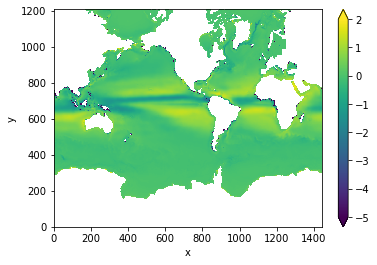

In [17]:
rnfselmap = RNF1.data_budget.squeeze()  
globalRN = rnfselmap.squeeze()
globalRN.mean(dim='time_counter').plot(vmin=-5,vmax=2)

stacked_data = globalRN.stack(z=("x", "y"))
tsglobalRN = stacked_data.sum(dim='z')

In [12]:
tsglobalRN.mean().values

array(1106.52097189)

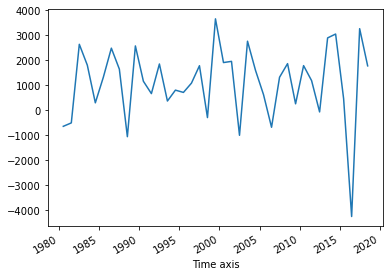

In [13]:
tsglobalRN.plot()

In average : global net water flux is about 1000 km3/yr or Gt/yr

---
# Surface water flux damping correction: about 414 000  Gt/yr  (33 000 km3/yr)

* Load flux correction in flxT files

In [7]:
varnarnf = 'wdmp'

In [8]:
# RNF
RNF1 = li.imhov(rnffiles, varnarnf,nexp,fo,y1,y2,diff=False,dirigrid=diri)
RNF1.process()
RNF1.convertRNF()

* Plot Global map  in km3/yr (as a check of total budget):

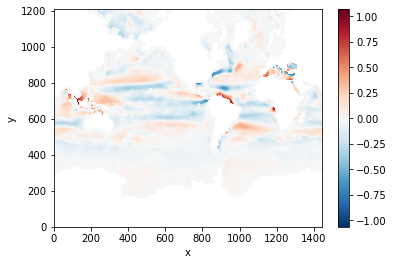

In [9]:
rnfselmap = RNF1.data_budget.squeeze().mean(dim='time_counter').plot()

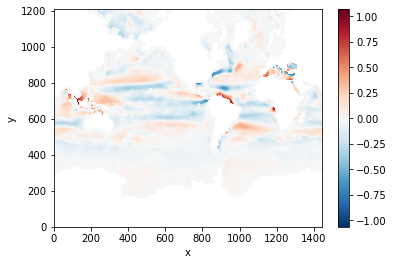

In [15]:
rnfselmap = RNF1.data_budget.squeeze()  
globalRN = rnfselmap.squeeze()
globalRN.mean(dim='time_counter').plot()

stacked_data = globalRN.stack(z=("x", "y"))
tsglobalRN = stacked_data.sum(dim='z')

In [16]:
tsglobalRN.mean().values

array(-13536.93640663)

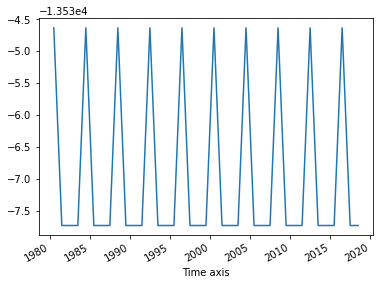

In [17]:
tsglobalRN.plot()

In average : global surface flux correction about -13 000 km3/yr or Gt/yr

* Load flux correction in flxT files

In [5]:
varnarnf = 'solhflup'

In [6]:
# RNF
RNF1 = li.imhov(rnffiles, varnarnf,nexp,fo,y1,y2,diff=False,dirigrid=diri)
RNF1.process()
# RNF1.convertRNF()

* Plot Global map 

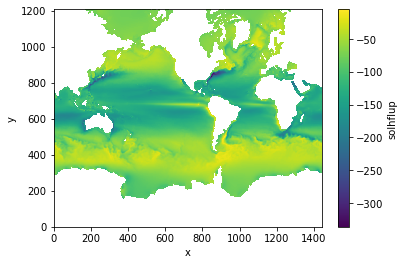

In [7]:
rnfselmap = RNF1.data.squeeze().mean(dim='time_counter').plot()

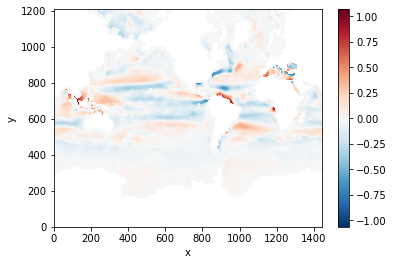

In [15]:
rnfselmap = RNF1.data.squeeze()  
globalRN = rnfselmap.squeeze()

globalRN = globalRN*globalRN.e1*globalRN.e1
globalRN.mean(dim='time_counter').plot()




stacked_data = globalRN.stack(z=("x", "y"))
tsglobalRN = stacked_data.sum(dim='z')

In [16]:
tsglobalRN.mean().values

array(-13536.93640663)

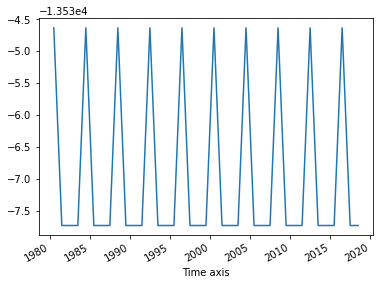

In [17]:
tsglobalRN.plot()

In average : global surface flux correction about -13 000 km3/yr or Gt/yr